# Generate image dataset with shapes

This notebook provides code to generate a synthetic image dataset with various shapes in them. We can use this dataset as input to a CNN. There are a few different kinds of datasets covered.


## Defining shapes and minimum dimensions

We will generate images with different kinds of shapes. Each shape will have a minimum width/length and each shape will be at least some pixels away from the image edges

In [5]:
import os
from PIL import Image, ImageDraw
from random import randint
import numpy as np
import math

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

%matplotlib inline


IMG_PADDING = 2
SHAPE_MIN_DIMENSION = 20

## Helper function to save images

This is a helper function that simply saves the image at the provided file location

In [3]:
def saveimg(filename, img):
    if not os.path.isfile(filename):
        #print("Saving", filename )
        img.save(filename)
    else:
        print("File already exists", filename)

## Helper functions to generate images with various shapes and save them

The function below generates an image of specified width and height and background color. The image includes a shape (also passed as a function parameter) with the provided color. The dimensions of the shape are randomly generated.

In [4]:
def genImageWithEllipse(imgFileName, frame_width, frame_height, img_type, backColor, fillColor):
   
    # draw the shape and save it to file
    img = Image.new(img_type, (frame_width, frame_height), backColor)    
   
    draw = ImageDraw.Draw(img)          

    x1 = randint(IMG_PADDING, frame_width - SHAPE_MIN_DIMENSION - IMG_PADDING)
    y1 = randint(IMG_PADDING, frame_height - SHAPE_MIN_DIMENSION - IMG_PADDING)

    # calculate cooridnate for an ellipse
    x2 = randint(x1 + SHAPE_MIN_DIMENSION, frame_width - IMG_PADDING)                
    y2 = randint(y1 + SHAPE_MIN_DIMENSION, frame_height - IMG_PADDING)
    
    draw.ellipse((x1, y1, x2, y2), fill = fillColor)     

    saveimg(imgFileName, img)          

In [5]:
def genImageWithRectangle(imgFileName, frame_width, frame_height, img_type, backColor, fillColor):
    
    # draw the shape and save it to file
    img = Image.new(img_type, (frame_width, frame_height), backColor)    
    draw = ImageDraw.Draw(img)          

    x1 = randint(IMG_PADDING, frame_width - SHAPE_MIN_DIMENSION - IMG_PADDING)
    y1 = randint(IMG_PADDING, frame_height - SHAPE_MIN_DIMENSION - IMG_PADDING)

    # calculate cooridnate for a rectangle
    x2 = randint(x1 + SHAPE_MIN_DIMENSION, frame_width - IMG_PADDING)                
    y2 = randint(y1 + SHAPE_MIN_DIMENSION, frame_height - IMG_PADDING)
    
    draw.rectangle((x1, y1, x2, y2), fill = fillColor)     

    saveimg(imgFileName, img)     

In [6]:
def genImageWithTriangle(imgFileName, frame_width, frame_height, img_type, backColor, fillColor):
    
    # draw the shape and save it to file
    img = Image.new(img_type, (frame_width, frame_height), backColor)    
    draw = ImageDraw.Draw(img)          

    x1 = randint(IMG_PADDING, frame_width - SHAPE_MIN_DIMENSION - IMG_PADDING)
    y1 = randint(SHAPE_MIN_DIMENSION + IMG_PADDING, frame_height - IMG_PADDING)

    
    x2 = randint(x1 + SHAPE_MIN_DIMENSION, frame_width - IMG_PADDING)                
    y2 = y1
    
    x3 = randint(x1, x2)
    y3 = randint(IMG_PADDING, y1 - SHAPE_MIN_DIMENSION)
    
    draw.polygon([(x1,y1), (x2,y2), (x3,y3)], fill = fillColor)    

    saveimg(imgFileName, img)   

## Helper function to generate a black and white image

The function below generates a black and white image. It randomly selects the background color to be black or white and then selects the other color as the shape fill color.

In [7]:
def genColorsForBWImage():
    
    backColor = randint(0, 1)        
    fillColor = 0

    if (backColor == 0):
        fillColor = 255
    else:
        backColor = 255
        
    return backColor, fillColor

## Helper function to generate a grayscale image

The function below generates a grayscale image. It randomly selects the background color and the color of the shape

In [8]:
def genColorsForGrayscaleImage():
    
    backColor = randint(0, 255)        
    fillColor = randint(0, 255)
    
    return backColor, fillColor

## Helper function to generate a RGB image

This function generated a RGB image by generating a random background and shape fill color

In [9]:
def genColorsForRGBImage():
            
    r = randint(0, 255)
    g = randint(0, 255)
    b = randint(0, 255)        

    fr = randint(0, 255)
    fg = randint(0, 255)
    fb = randint(0, 255)      

    backColor = (r, g, b)
    fillColor = (fr, fg, fb)

    return backColor, fillColor


## Function to generate list of images and the corresponding index file

This function generates the specified number of images (of provided type and size) and also an index file. The function generates equal number of images for each of the 4 shapes.

In [18]:
def genImages(dirname, index_filename, frame_width, frame_height, numImages, start_idx, imgType = "RGB", print_frequency = 1000):
    
    f = open(index_filename, "a+")

    if ((imgType == "BW") or (imgType == "GS")):        
        img_type = 'L'
    else:
        img_type = 'RGB'
    
    for i in range(start_idx, numImages + start_idx):
        
        if ((i % print_frequency) == 0):
            print("Generating image " + str(i))                
        
        imgFileName = dirname + "/" + str(i) + ".png"                    
            
        backColor = 0
        fillColor = 0       
            
        if (imgType == "RGB"):
            backColor, fillColor = genColorsForRGBImage()
        elif (imgType == "BW"):
            backColor, fillColor = genColorsForBWImage()
        elif (imgType == "GS"):
            backColor, fillColor = genColorsForGrayscaleImage()
                               
        s = i % 3
        
        if (s == 0):
            genImageWithEllipse(imgFileName, frame_width, frame_height, img_type, backColor, fillColor)
        elif (s == 1):
            genImageWithRectangle(imgFileName, frame_width, frame_height, img_type, backColor, fillColor)
        elif(s == 2):
            genImageWithTriangle(imgFileName, frame_width, frame_height, img_type, backColor, fillColor)
                    
        f.write(imgFileName + "\t" + str(s) + "\n")
        
    f.close()   
    
    print("Done generating images")

## Generate images

Using the above functions, we can now generate a black & white or grayscale or RGB image dataset.

In [44]:
genImages("./train-bw-shapes-dataset", "./train-bw-shapes-idx.txt", 100, 150, 15000, 0, "BW")
genImages("./test-bw-shapes-dataset", "./test-bw-shapes-idx.txt", 100, 150, 3000, 0, "BW")

Generating image 0
Generating image 1000
Generating image 2000
Generating image 3000
Generating image 4000
Generating image 5000
Generating image 6000
Generating image 7000
Generating image 8000
Generating image 9000
Generating image 10000
Generating image 11000
Generating image 12000
Generating image 13000
Generating image 14000
Done generating images
Generating image 0
Generating image 1000
Generating image 2000
Done generating images


### Display image

Let's display one of the images over here

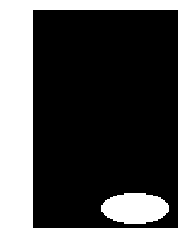

In [7]:
image = Image.open("./train-bw-shapes-dataset/0.png")
arr = np.asarray(image)
plt.axis('off')
plt.imshow(arr, cmap='gray')
plt.show()

In [13]:
genImages("./train-gs-shapes-dataset", "./train-gs-shapes-idx.txt", 100, 150, 15000, 0, "GS")
genImages("./test-gs-shapes-dataset", "./test-gs-shapes-idx.txt", 100, 150, 3000, 0, "GS")

Generating image 0
Generating image 1000
Generating image 2000
Generating image 3000
Generating image 4000
Generating image 5000
Generating image 6000
Generating image 7000
Generating image 8000
Generating image 9000
Generating image 10000
Generating image 11000
Generating image 12000
Generating image 13000
Generating image 14000
Done generating images
Generating image 0
Generating image 1000
Generating image 2000
Done generating images


In [17]:
genImages("./train-rgb-shapes-dataset", "./train-rgb-shapes-idx.txt", 100, 150, 15000, 0, "RGB")
genImages("./test-rgb-shapes-dataset", "./test-rgb-shapes-idx.txt", 100, 150, 3000, 0, "RGB")

Generating image 0
Generating image 1000
Generating image 2000
Generating image 3000
Generating image 4000
Generating image 5000
Generating image 6000
Generating image 7000
Generating image 8000
Generating image 9000
Generating image 10000
Generating image 11000
Generating image 12000
Generating image 13000
Generating image 14000
Done generating images
Generating image 0
Generating image 1000
Generating image 2000
Done generating images


In [19]:
genImages("./train-rgb-shapes-dataset", "./train-rgb-shapes-idx.txt", 100, 150, 15000, 15000, "RGB")
genImages("./test-rgb-shapes-dataset", "./test-rgb-shapes-idx.txt", 100, 150, 3000, 3000, "RGB")

Generating image 15000
Generating image 16000
Generating image 17000
Generating image 18000
Generating image 19000
Generating image 20000
Generating image 21000
Generating image 22000
Generating image 23000
Generating image 24000
Generating image 25000
Generating image 26000
Generating image 27000
Generating image 28000
Generating image 29000
Done generating images
Generating image 3000
Generating image 4000
Generating image 5000
Done generating images
